# **Exploratory Data Analyst (EDA)**

Source Tableau : https://public.tableau.com/app/profile/banyu.nurmanjaya/viz/Book2_17249290209960/Dashboard2?publish=yes

## **1. Import Library**

In [1]:
# !pip install gdown

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

## **2. Data Loading**

In [3]:
file_id = '149VrLArVgJJJP8BpGviW_2ZU4FonJR-k'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'stock', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=149VrLArVgJJJP8BpGviW_2ZU4FonJR-k
From (redirected): https://drive.google.com/uc?id=149VrLArVgJJJP8BpGviW_2ZU4FonJR-k&confirm=t&uuid=0e47bbff-3bd0-4f73-bfa7-c2728e97714a
To: c:\Users\Lenovo ThinkPad X280\Downloads\f_project\stock
100%|██████████| 106M/106M [00:22<00:00, 4.74MB/s] 


'stock'

In [4]:
df = pd.read_csv('stock')
df

,Unnamed: 0,date,symbol,Security,GICS Sector,GICS Sub Industry,open,close,low,high,volume
0,0,2016-01-05,WLTW,Willis Towers Watson,Financials,Insurance Brokers,123.430000,125.839996,122.309998,126.250000,2163600.0
1,1,2016-01-06,WLTW,Willis Towers Watson,Financials,Insurance Brokers,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2,2016-01-07,WLTW,Willis Towers Watson,Financials,Insurance Brokers,116.379997,114.949997,114.930000,119.739998,2489500.0
3,3,2016-01-08,WLTW,Willis Towers Watson,Financials,Insurance Brokers,115.480003,116.620003,113.500000,117.440002,2006300.0
4,4,2016-01-11,WLTW,Willis Towers Watson,Financials,Insurance Brokers,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...,...,...,...,...
851259,851259,2016-12-30,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,103.309998,103.199997,102.849998,103.930000,973800.0
851260,851260,2016-12-30,ZION,Zions Bancorp,Financials,Regional Banks,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,851261,2016-12-30,ZTS,Zoetis,Health Care,Pharmaceuticals,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,851262,2016-12-30,AIV,Apartment Investment & Mgmt,Real Estate,REITs,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['date', 'symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'open', 'close', 'low', 'high', 'volume'],
      dtype='object')

In [7]:
df.nunique()

date                   1762
symbol                  501
Security                501
GICS Sector              11
GICS Sub Industry       124
open                  97522
close                 98520
low                   97470
high                  97784
volume               171073
dtype: int64

In [8]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [9]:
df.shape

(851264, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               851264 non-null  object 
 1   symbol             851264 non-null  object 
 2   Security           851264 non-null  object 
 3   GICS Sector        851264 non-null  object 
 4   GICS Sub Industry  851264 non-null  object 
 5   open               851264 non-null  float64
 6   close              851264 non-null  float64
 7   low                851264 non-null  float64
 8   high               851264 non-null  float64
 9   volume             851264 non-null  float64
dtypes: float64(5), object(5)
memory usage: 64.9+ MB


In [11]:
df['tanggal'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
df['tahun'] = df['tanggal'].dt.year

In [13]:
df

,date,symbol,Security,GICS Sector,GICS Sub Industry,open,close,low,high,volume,tanggal,tahun
0,2016-01-05,WLTW,Willis Towers Watson,Financials,Insurance Brokers,123.430000,125.839996,122.309998,126.250000,2163600.0,2016-01-05,2016
1,2016-01-06,WLTW,Willis Towers Watson,Financials,Insurance Brokers,125.239998,119.980003,119.940002,125.540001,2386400.0,2016-01-06,2016
2,2016-01-07,WLTW,Willis Towers Watson,Financials,Insurance Brokers,116.379997,114.949997,114.930000,119.739998,2489500.0,2016-01-07,2016
3,2016-01-08,WLTW,Willis Towers Watson,Financials,Insurance Brokers,115.480003,116.620003,113.500000,117.440002,2006300.0,2016-01-08,2016
4,2016-01-11,WLTW,Willis Towers Watson,Financials,Insurance Brokers,117.010002,114.970001,114.089996,117.330002,1408600.0,2016-01-11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,103.309998,103.199997,102.849998,103.930000,973800.0,2016-12-30,2016
851260,2016-12-30,ZION,Zions Bancorp,Financials,Regional Banks,43.070000,43.040001,42.689999,43.310001,1938100.0,2016-12-30,2016
851261,2016-12-30,ZTS,Zoetis,Health Care,Pharmaceuticals,53.639999,53.529999,53.270000,53.740002,1701200.0,2016-12-30,2016
851262,2016-12-30,AIV,Apartment Investment & Mgmt,Real Estate,REITs,44.730000,45.450001,44.410000,45.590000,1380900.0,2016-12-30,2016


In [14]:
df['tahun'].unique()

array([2016, 2010, 2011, 2012, 2013, 2014, 2015])

In [15]:
company_analysis = df.groupby('symbol').agg({
    'close': ['mean', 'min', 'max'],
    'volume': 'sum'
}).reset_index()

print("Company Specific Analysis:")
print(company_analysis.head())

Company Specific Analysis:
  symbol       close                               volume
                mean        min         max           sum
0      A   34.080221  19.291845   48.439999  6.920412e+09
1    AAL   23.873768   4.000000   55.759998  1.648182e+10
2    AAP  103.769597  39.160000  200.380005  1.800811e+09
3   AAPL   79.402683  27.435715  133.000000  1.660258e+11
4   ABBV   55.473641  33.709999   71.230003  8.538555e+09


## **3. Visualization**

### **3.1. Average Closing Price per Sector**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\1174255711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_performance, x='GICS Sector', y='close', palette='viridis')


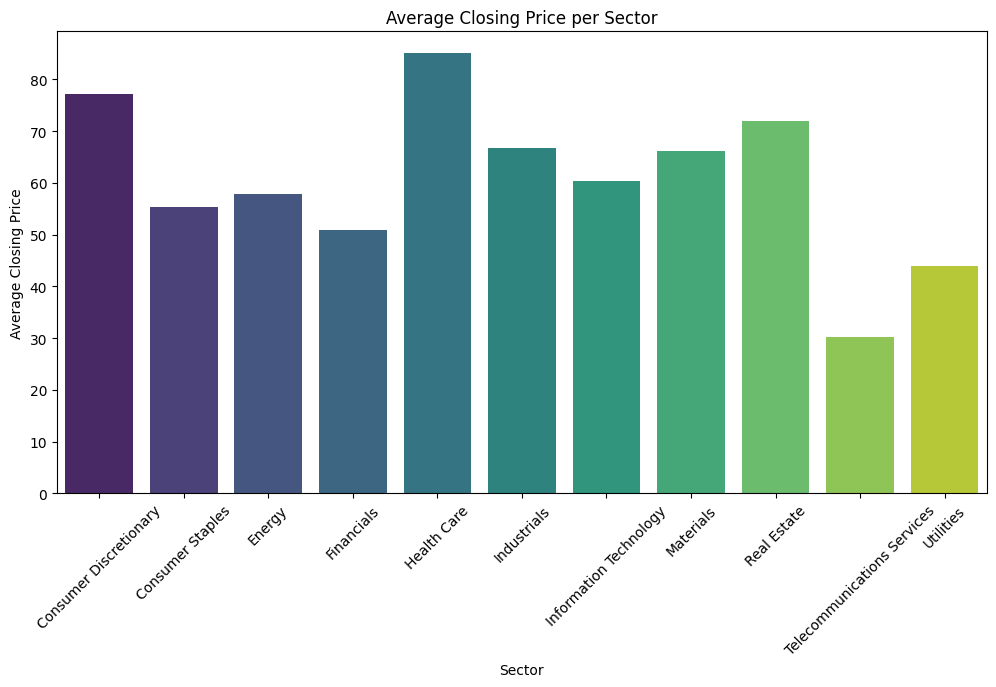

In [16]:
sector_performance = df.groupby('GICS Sector')['close'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sector_performance, x='GICS Sector', y='close', palette='viridis')

plt.title('Average Closing Price per Sector')
plt.xlabel('Sector')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)

plt.show()

### **3.2. Performance of Each Industry (Top 5)**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\3491391309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_industries, x='GICS Sub Industry', y='close', palette='viridis')


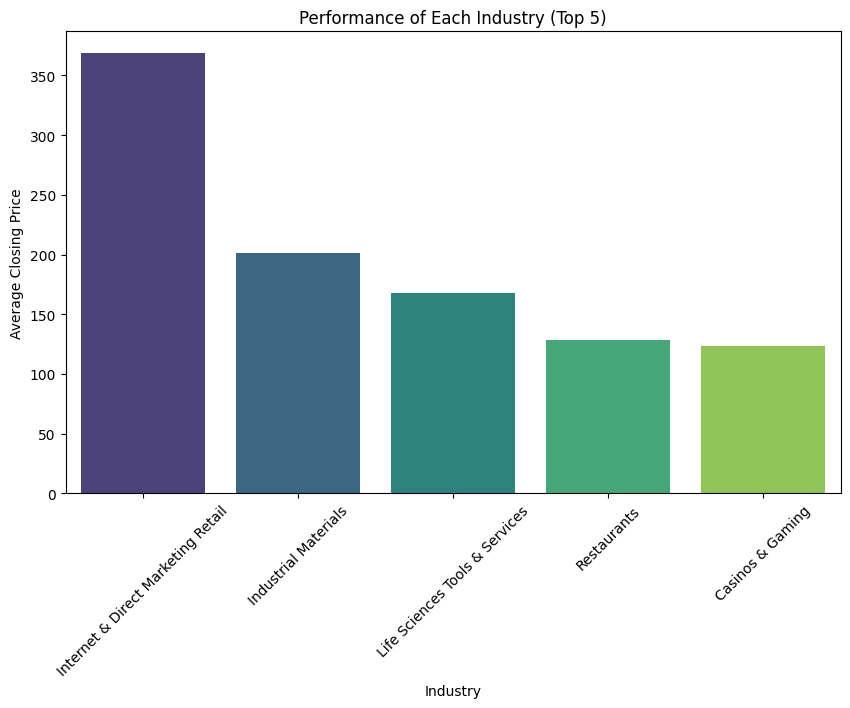

In [17]:
industry_performance = df.groupby('GICS Sub Industry')['close'].mean().reset_index()
top_5_industries = industry_performance.nlargest(5, 'close')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_industries, x='GICS Sub Industry', y='close', palette='viridis')

plt.title('Performance of Each Industry (Top 5)')
plt.xlabel('Industry')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)

plt.show()


### **3.3. Difference Between Closing Price and Opening Price**

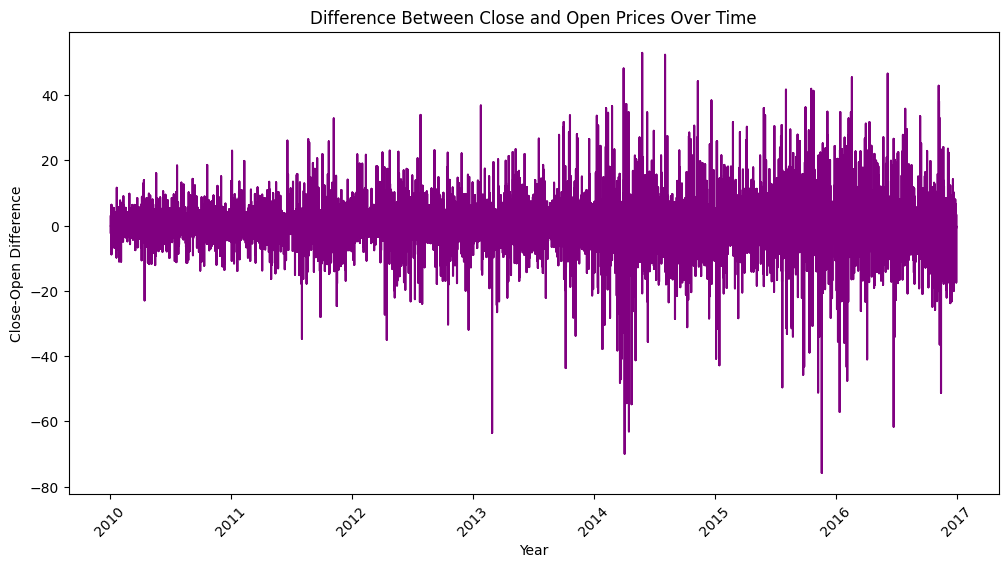

In [18]:
df['close_open_diff'] = df['close'] - df['open']

plt.figure(figsize=(12, 6))
plt.plot(df['tanggal'], df['close_open_diff'], color='purple')

plt.title('Difference Between Close and Open Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Close-Open Difference')
plt.xticks(rotation=45)

plt.show()

### **3.4. Top 5 Companies with the Highest Transaction Volume**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\4017817580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_highest_volume, x='symbol', y='volume', palette='viridis')


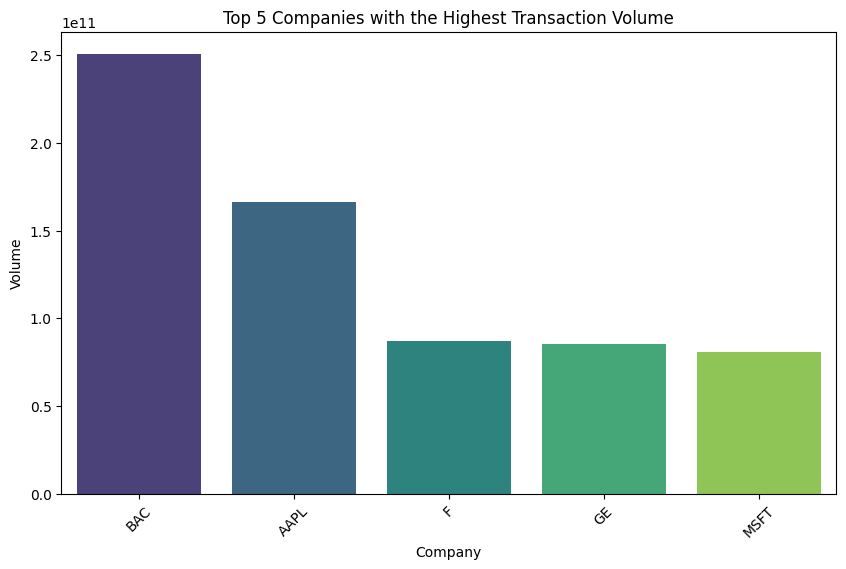

In [19]:
company_volume = df.groupby('symbol')['volume'].sum().reset_index()
top_5_highest_volume = company_volume.nlargest(5, 'volume')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_highest_volume, x='symbol', y='volume', palette='viridis')

plt.title('Top 5 Companies with the Highest Transaction Volume')
plt.xlabel('Company')
plt.ylabel('Volume')
plt.xticks(rotation=45)

plt.show()

### **3.5. Top 5 Companies with the Lowest Transaction Volume**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\16643269.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_lowest_volume, x='symbol', y='volume', palette='viridis')


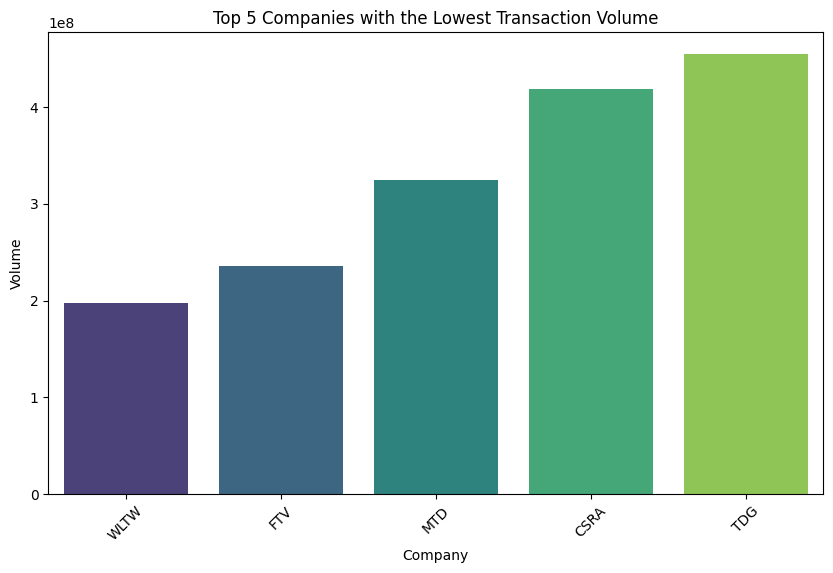

In [20]:
top_5_lowest_volume = company_volume.nsmallest(5, 'volume')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_lowest_volume, x='symbol', y='volume', palette='viridis')

plt.title('Top 5 Companies with the Lowest Transaction Volume')
plt.xlabel('Company')
plt.ylabel('Volume')
plt.xticks(rotation=45)

plt.show()

### **3.6. Stock Price Performance Based on Price Direction per Year**

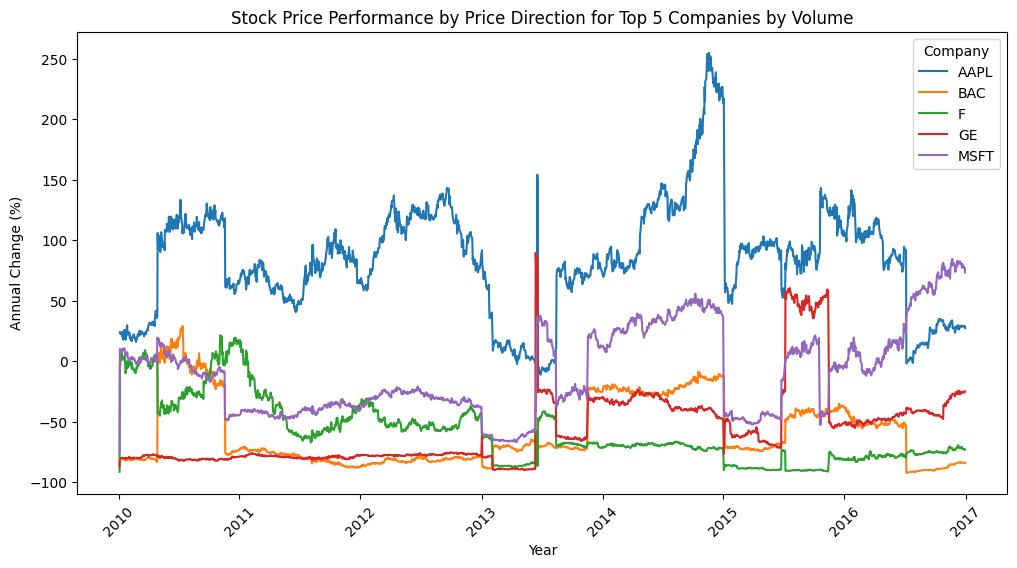

In [21]:
df['yearly_change'] = df['close'].pct_change(periods=365) * 100
top_5_companies = df.groupby('symbol')['volume'].sum().nlargest(5).index
df_top_5 = df[df['symbol'].isin(top_5_companies)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_5, x='tanggal', y='yearly_change', hue='symbol', palette='tab10')

plt.title('Stock Price Performance by Price Direction for Top 5 Companies by Volume')
plt.xlabel('Year')
plt.ylabel('Annual Change (%)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

### **3.7. Sectors with High Growth Potential Based on Average Price Percentage Change Rate**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\2479324026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_growth_potential, x='sector_change', y='GICS Sector', palette='viridis')


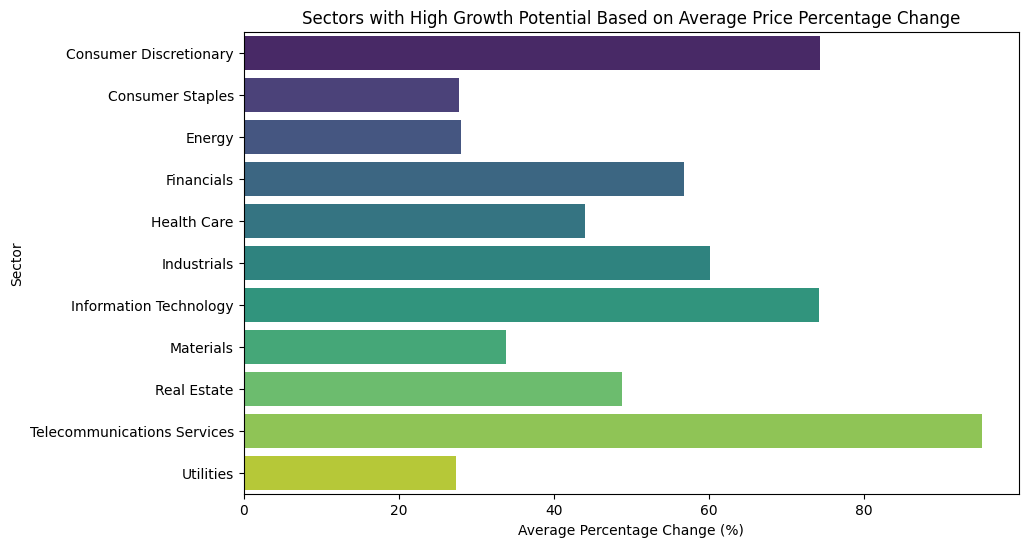

In [22]:
df['sector_change'] = df.groupby('GICS Sector')['close'].pct_change() * 100
sector_growth_potential = df.groupby('GICS Sector')['sector_change'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=sector_growth_potential, x='sector_change', y='GICS Sector', palette='viridis')

plt.title('Sectors with High Growth Potential Based on Average Price Percentage Change')
plt.xlabel('Average Percentage Change (%)')
plt.ylabel('Sector')


plt.show()


### **3.8. Daily Trading Volume**

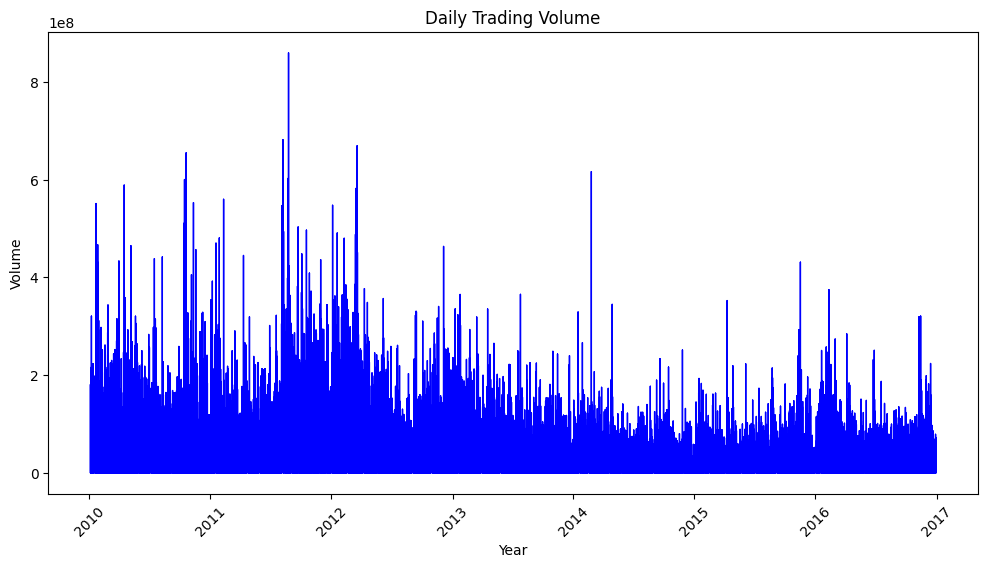

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['tanggal'], df['volume'], color='blue', linewidth=1)

plt.title('Daily Trading Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)

plt.show()

### **3.9. Correlation Analysis**

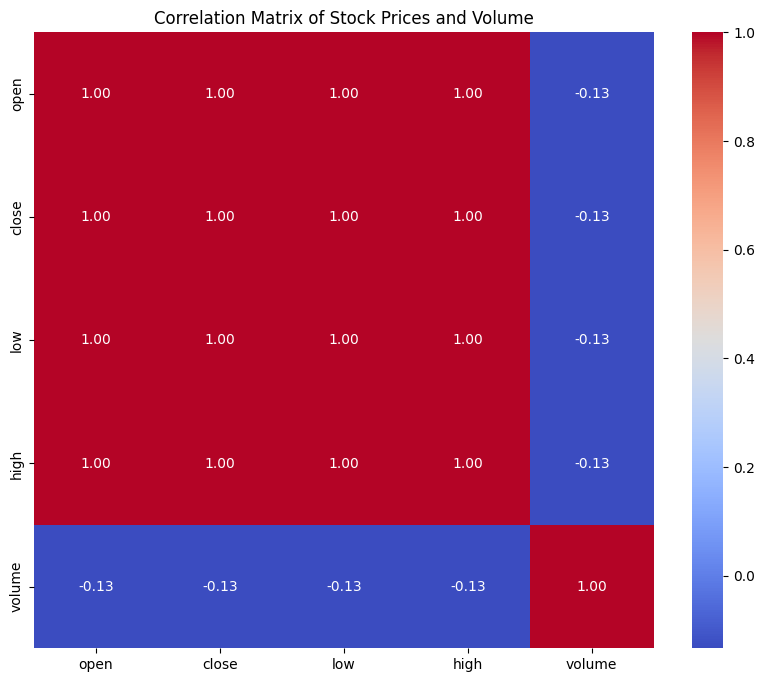

In [24]:
correlation = df[['open', 'close', 'low', 'high', 'volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Prices and Volume')

plt.show()

### **3.10. Identifying Days with Significant Price Changes**

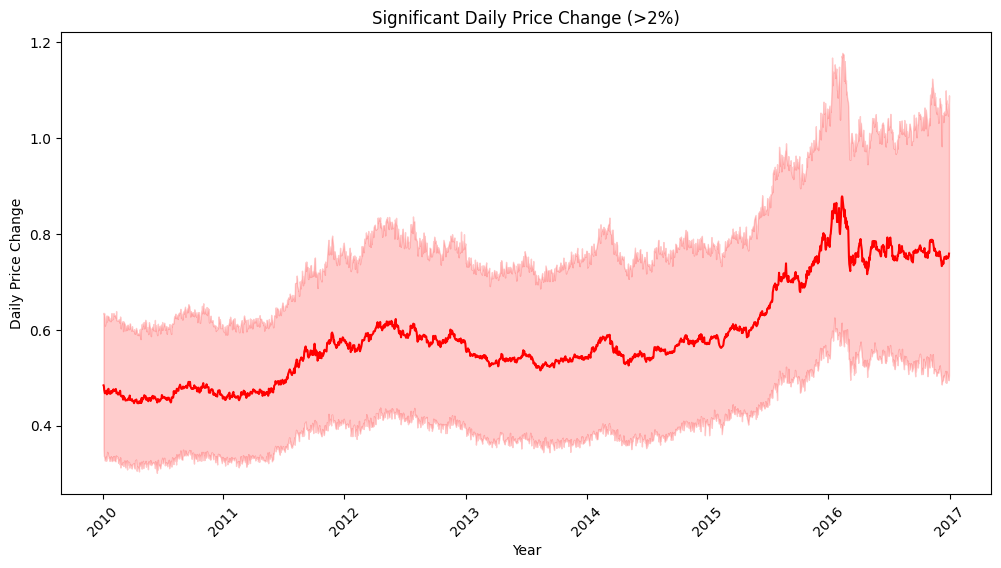

In [25]:
df['daily_change'] = df['close'].pct_change()
significant_changes = df[df['daily_change'].abs() > 0.02]  # memfilter untuk hari dengan perubahan harga signifikan (misalnya lebih dari 2%)

plt.figure(figsize=(12, 6))
sns.lineplot(data=significant_changes, x='tanggal', y='daily_change', color='red')

plt.title('Significant Daily Price Change (>2%)')
plt.xlabel('Year')
plt.ylabel('Daily Price Change')
plt.xticks(rotation=45)

plt.show()


### **3.11. Comparing Sector Performance**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\3113040285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_performance, x='close', y='GICS Sector', palette='viridis')


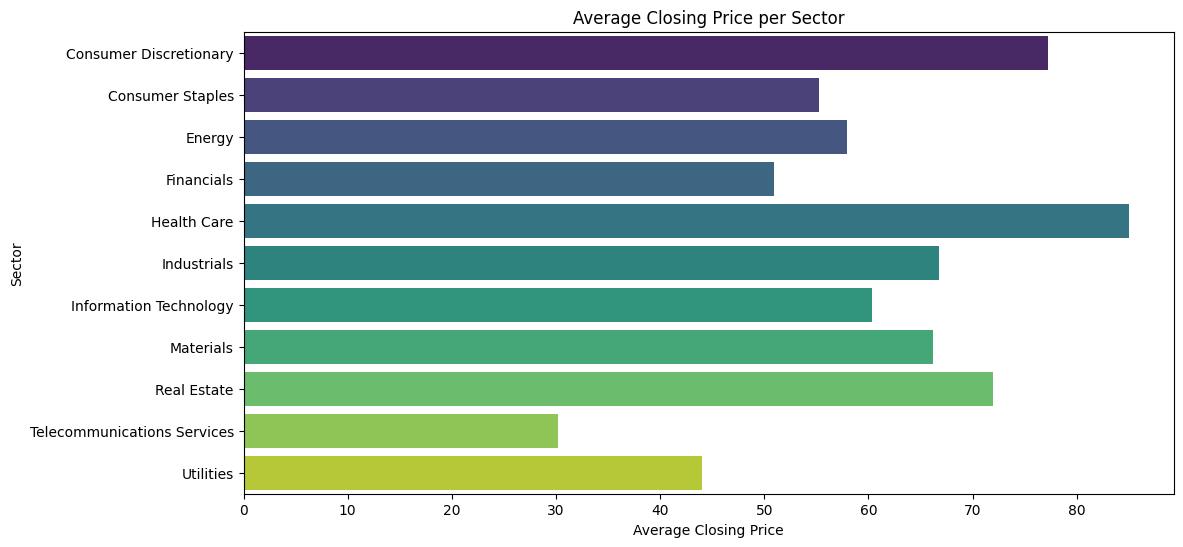

In [26]:
sector_performance = df.groupby('GICS Sector')['close'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sector_performance, x='close', y='GICS Sector', palette='viridis')

plt.title('Average Closing Price per Sector')
plt.xlabel('Average Closing Price')
plt.ylabel('Sector')

plt.show()

### **3.12. Seasonal Analysis**

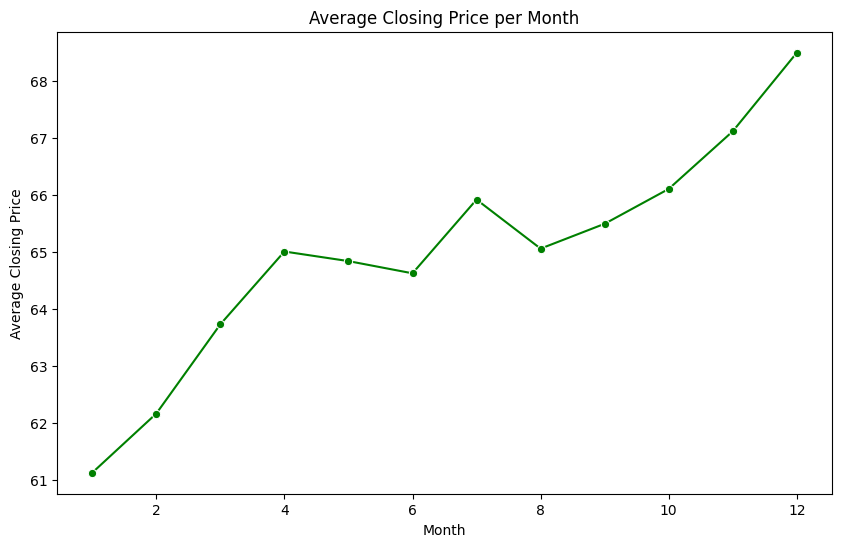

In [27]:
df['bulan'] = df['tanggal'].dt.month
monthly_performance = df.groupby('bulan')['close'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_performance, x='bulan', y='close', marker='o', color='green')

plt.title('Average Closing Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')

plt.show()

### **3.13. Sector Distribution**

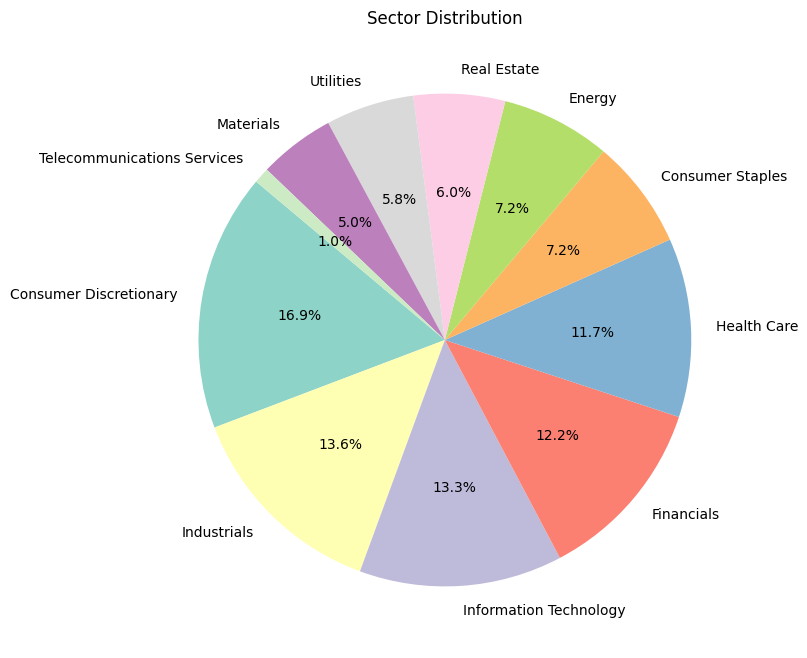

In [28]:
sector_distribution = df['GICS Sector'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(sector_distribution, labels=sector_distribution.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=140)
plt.title('Sector Distribution')

plt.show()

### **3.14. Distribuion of Trading Volume for Top 5 Companies**

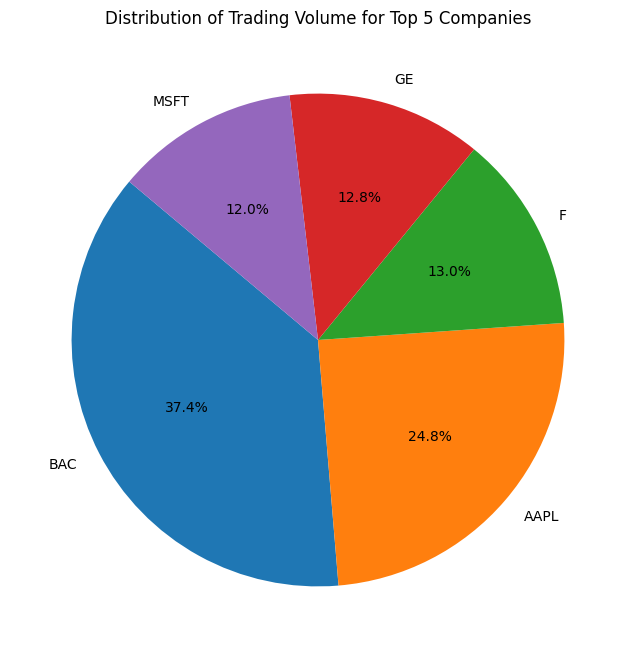

In [29]:
symbol_volume = df.groupby('symbol')['volume'].sum()
top_5_symbols = symbol_volume.nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_symbols, labels=top_5_symbols.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors, startangle=140)
plt.title('Distribution of Trading Volume for Top 5 Companies')

plt.show()

### **3.15. Top Sectors by Volume**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\2649421029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sector_by_volume, x='volume', y='GICS Sector', palette='magma')


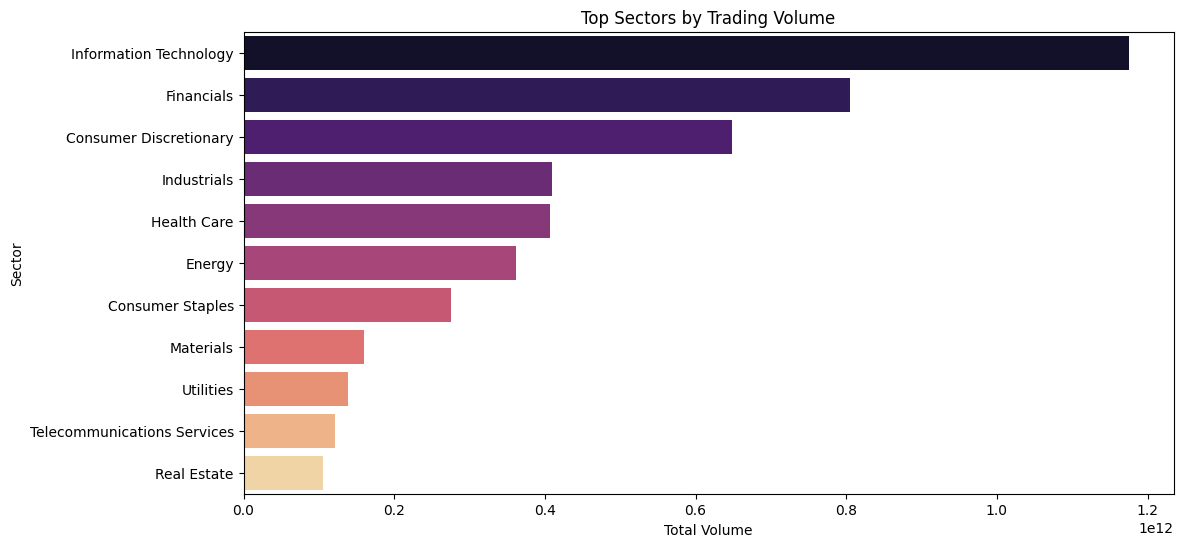

In [30]:
sector_volume = df.groupby('GICS Sector')['volume'].sum().reset_index()
top_sector_by_volume = sector_volume.sort_values(by='volume', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_sector_by_volume, x='volume', y='GICS Sector', palette='magma')

plt.title('Top Sectors by Trading Volume')
plt.xlabel('Total Volume')
plt.ylabel('Sector')

plt.show()

### **3.16. Top Symbols of the Best sectors by Volume**

C:\Users\Lenovo ThinkPad X280\AppData\Local\Temp\ipykernel_5732\2194257267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_symbol_by_volume, x='volume', y='symbol', palette='viridis')


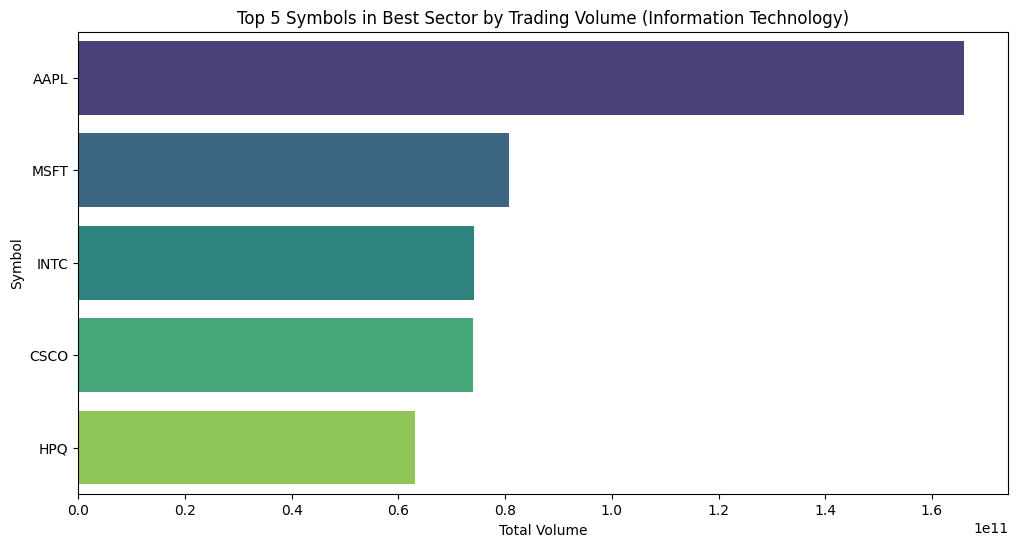

In [31]:
best_sector = top_sector_by_volume.iloc[0]['GICS Sector']
best_sector_data = df[df['GICS Sector'] == best_sector]
symbol_volume_best_sector = best_sector_data.groupby('symbol')['volume'].sum().reset_index()
top_5_symbol_by_volume = symbol_volume_best_sector.sort_values(by='volume', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_symbol_by_volume, x='volume', y='symbol', palette='viridis')

plt.title(f'Top 5 Symbols in Best Sector by Trading Volume ({best_sector})')
plt.xlabel('Total Volume')
plt.ylabel('Symbol')

plt.show()


### **3.17. Close Line Chart of the Top 5**

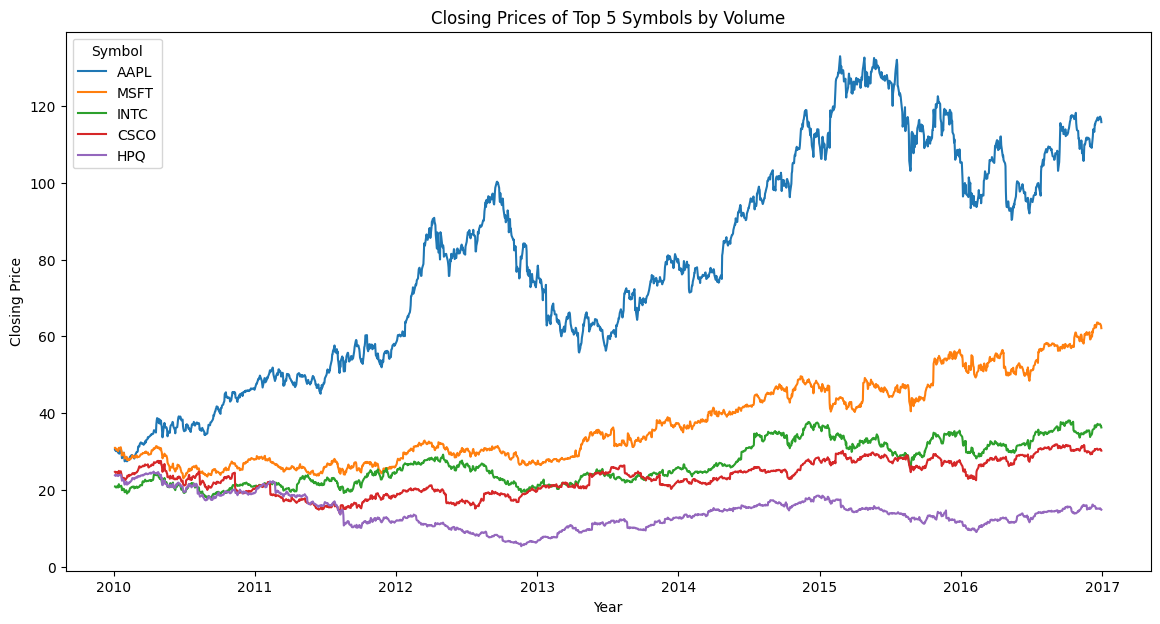

In [33]:
top_5_symbols = top_5_symbol_by_volume['symbol'].head(5)
top_5_data = df[df['symbol'].isin(top_5_symbols)]

plt.figure(figsize=(14, 7))
for symbol in top_5_symbols:
    symbol_data = top_5_data[top_5_data['symbol'] == symbol]
    plt.plot(symbol_data['tanggal'], symbol_data['close'], label=symbol)

plt.title('Closing Prices of Top 5 Symbols by Volume')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(title='Symbol')

plt.show()

## **4. Conclusion**

* Sektor teknologi, khususnya perusahaan seperti ``Apple dan Microsoft, menunjukkan kinerja yang sangat baik dalam hal volume perdagangan dan pertumbuhan harga.`` Ini mengindikasikan minat investor yang tinggi terhadap sektor ini

* Meskipun ada tren kenaikan umum, ``pasar saham menunjukkan tingkat volatilitas yang cukup tinggi.`` Ini berarti harga saham dapat mengalami fluktuasi yang signifikan dalam waktu singkat

* ``Meskipun berada dalam sektor yang sama, kinerja setiap perusahaan berbeda-beda.`` Faktor-faktor seperti inovasi produk, strategi bisnis, dan kondisi pasar yang spesifik dapat mempengaruhi kinerja masing-masing perusahaan

## **5. Business Implications**

**1. Peluang Investasi:** 
* Investor dapat mempertimbangkan untuk ``mengalokasikan sebagian portofolio mereka pada saham-saham perusahaan teknologi`` yang memiliki prospek pertumbuhan yang baik
* Meskipun sektor teknologi cukup menjanjikan, ``diversifikasi portofolio ke sektor lain juga penting untuk mengurangi risiko``
* Sebelum berinvestasi, penting untuk ``melakukan analisis fundamental yang mendalam`` terhadap perusahaan untuk memahami valuasi dan prospek jangka panjangnya

**2. Manajemen Risiko:** 
* Investor perlu menyadari bahwa ``pasar saham bersifat fluktuatif dan harga saham dapat berfluktuasi secara signifikan``
* ``Diversifikasi portofolio dapat membantu mengurangi risiko kerugian akibat fluktuasi pasar``
* ``Menggunakan instrumen derivatif seperti opsi atau kontrak berjangka`` dapat menjadi salah satu cara untuk melindungi portofolio dari risiko penurunan harga

**3. Strategi Perusahaan:** 
* ``Perusahaan harus terus berinovasi`` agar tetap kompetitif dan menarik investor
* ``Perusahaan perlu mengelola biaya secara efisien`` untuk meningkatkan profitabilitas
* ``Membangun hubungan baik dengan investor`` sangat penting untuk mendapatkan dukungan finansial